
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;"> Tianxin Huang (th29885); Rulan Pan (rp33973) </p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [1]:
import numpy as np

data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

(a) (5pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.


Populating the interactive namespace from numpy and matplotlib
MSE= 6455.708453830031


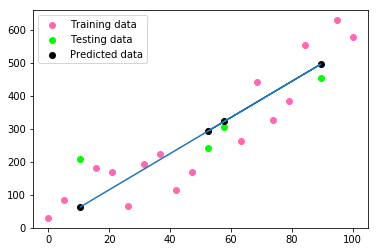

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
%pylab inline

reg = linear_model.LinearRegression()
reg.fit (x_train, y_train)

# Make predictions
y_pred = reg.predict(x_test)

# Plot
plt.figure(figsize=(6,4))
plt.scatter(x_train,y_train, color = 'hotpink', label = 'Training data')
scatter(x_test, y_test, color = 'lime', label = "Testing data")
plt.scatter(x_test, y_pred, color = 'black', label = "Predicted data")
plt.plot(x_test,y_pred.reshape(-1,1))
plt.legend(loc = 'best')

# Mean square error
mse= mean_squared_error(y_test,y_pred)
print ('MSE=',mse)


(b) (5pts) Fit polynomial models of degrees 1,2,3 and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.


In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly1 = PolynomialFeatures(degree=1)
x_train1 = poly1.fit_transform(x_train)
x_test1 = poly1.fit_transform(x_test)
reg1 = linear_model.LinearRegression()
reg1.fit(x_train1, y_train)
y_pred1_train = reg1.predict(x_train1)
y_pred1 = reg1.predict(x_test1)
print ('When degree = 1')
print ('MSE of training set is ')
print (round(mean_squared_error(y_pred1_train, y_train),2))
print ('MSE of testing set is ')
print (round(mean_squared_error(y_pred1, y_test),2))

poly2 = PolynomialFeatures(degree=2)
x_train2 = poly2.fit_transform(x_train)
x_test2 = poly2.fit_transform(x_test)
reg2 = linear_model.LinearRegression()
reg2.fit(x_train2, y_train)
y_pred2_train = reg2.predict(x_train2)
y_pred2 = reg2.predict(x_test2)
print ('When degree = 2')
print ('MSE of training set is ')
print (round(mean_squared_error(y_pred2_train, y_train),2))
print ('MSE of testing set is ')
print (round(mean_squared_error(y_pred2, y_test),2))

poly3 = PolynomialFeatures(degree=3)
x_train3 = poly3.fit_transform(x_train)
x_test3 = poly3.fit_transform(x_test)
reg3 = linear_model.LinearRegression()
reg3.fit(x_train3, y_train)
y_pred3_train = reg3.predict(x_train3)
y_pred3 = reg3.predict(x_test3)
print ('When degree = 3')
print ('MSE of training set is ')
print (round(mean_squared_error(y_pred3_train, y_train),2))
print ('MSE of testing set is ')
print (round(mean_squared_error(y_pred3, y_test),2))

poly5 = PolynomialFeatures(degree=5)
x_train5 = poly5.fit_transform(x_train)
x_test5 = poly5.fit_transform(x_test)
reg5 = linear_model.LinearRegression()
reg5.fit(x_train5, y_train)
y_pred5_train = reg5.predict(x_train5)
y_pred5 = reg5.predict(x_test5)
print ('When degree = 5')
print ('MSE of training set is ')
print (round(mean_squared_error(y_pred5_train, y_train),2))
print ('MSE of testing set is ')
print (round(mean_squared_error(y_pred5, y_test),2))

When degree = 1
MSE of training set is 
5339.13
MSE of testing set is 
6455.71
When degree = 2
MSE of training set is 
3638.12
MSE of testing set is 
4683.31
When degree = 3
MSE of training set is 
3569.9
MSE of testing set is 
4602.2
When degree = 5
MSE of training set is 
2661.57
MSE of testing set is 
6599.13


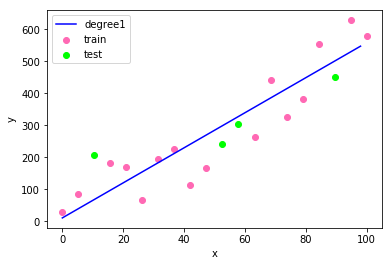

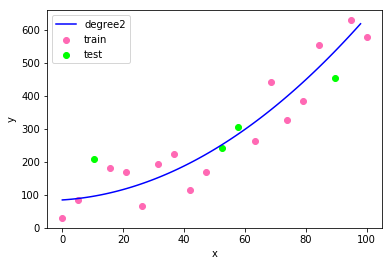

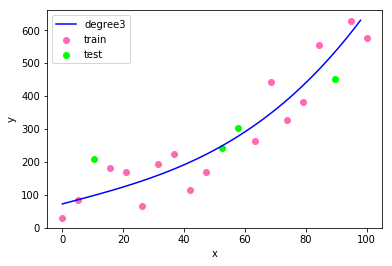

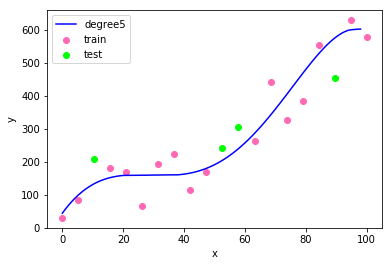

In [14]:
import numpy as np
x = np.array(range(1,100)).reshape(-1,1)
x_train1 = poly1.fit_transform(x)
x_train2 = poly2.fit_transform(x)
x_train3 = poly3.fit_transform(x)
x_train5 = poly5.fit_transform(x)

line1 = reg1.intercept_+ np.dot(x_train1,reg1.coef_.reshape(2,-1))
line2 = reg2.intercept_+ np.dot(x_train2,reg2.coef_.reshape(3,-1))
line3 = reg3.intercept_+ np.dot(x_train3,reg3.coef_.reshape(4,-1))
line5 = reg5.intercept_+ np.dot(x_train5,reg5.coef_.reshape(6,-1))
list_line = [line1, line2, line3, line5]
list_degree = [1,2,3,5]
for i in range(4):
    scatter(x_train, y_train, color='hotpink',label='train')
    scatter(x_test, y_test, color='lime',label='test')
    plot(sorted(list_line[i]), color = 'blue',label = 'degree'+str(list_degree[i]))
    xlabel('x')
    ylabel('y')
    legend(loc='best')
    show()


(c) (5pts) Which model performed the best? Explain using the bias-variance tradeoff.


We think Polynomial Model with degress 3 performs the best since its mse of 4602.2 is the least among all the models. When degree increases from 1, 2, 3 to 5, the model becomes more complex. Variance increases while bias decreases. There exists a sweet point where the sum of bias square and variance becomes the smallest, which is the expectation of sum squared error. From our experiment of different degrees, the sweet point occurs at degree 3.

# Question 1. Data Exploration (20pts)
Use the following code to import the dataset.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

(a) (1pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows.



In [16]:
shape = data.shape
rows = data.shape[0]
columns = data.shape[1]
print ('rows =', rows)
print ('columns =', columns)
data.head(5)


rows = 200
columns = 4


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


(b) (4pts) Generate box-plots for each of the four columns and identify the cutoff values for outliers.



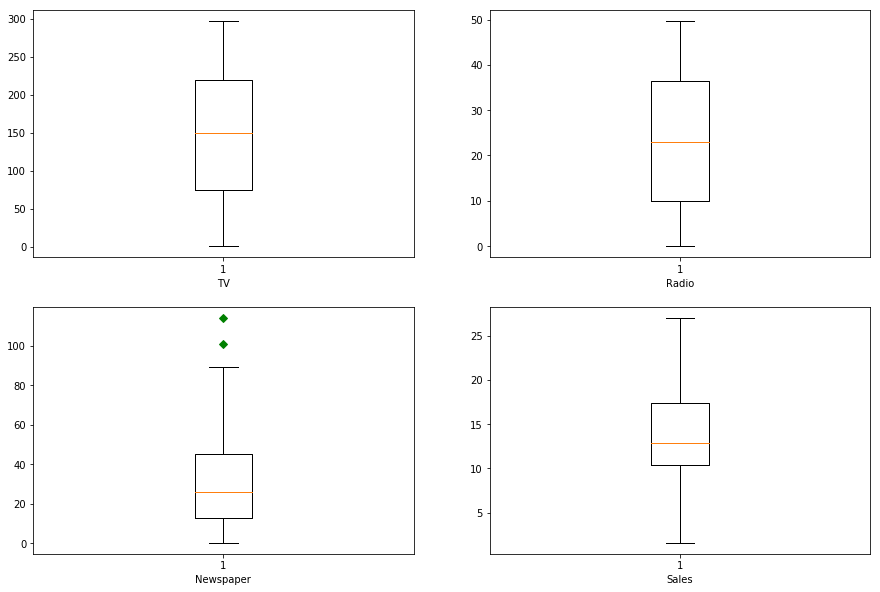

Cutoff values of  TV are values greater than 435.500 or less than -142.300
Cutoff values of  Radio are values greater than 76.350 or less than -29.850
Cutoff values of  Newspaper are values greater than 93.625 or less than -35.775
Cutoff values of  Sales are values greater than 27.937 or less than -0.162


In [20]:
import matplotlib.pyplot as plt
import numpy as np

varlist =['TV', 'Radio','Newspaper','Sales']
fig=plt.figure(figsize=(15,10))
for i in range(4):
    n=221+i
    fig.add_subplot(n)
    boxplot(data[varlist[i]],0,'gD')
    xlabel(varlist[i])
show()

for col in varlist:
    a=np.percentile(data[col],25)
    b=np.percentile(data[col],75)
    IQR = b-a
    print('Cutoff values of ', col, 'are values greater than %.3f'%(b+1.5*IQR),'or less than %.3f'%(a-1.5*IQR))


(c) (4pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.


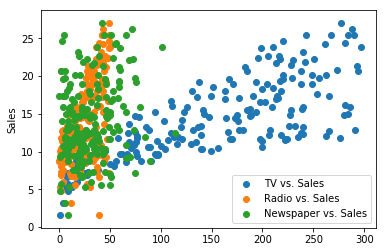

In [21]:
plt.scatter(data['TV'],data['Sales'], label = "TV vs. Sales")
plt.scatter(data['Radio'],data['Sales'], label = "Radio vs. Sales")
plt.scatter(data['Newspaper'],data['Sales'], label = "Newspaper vs. Sales")
ylabel('Sales')
plt.legend(loc = 'best')

The graph shows that all of the 3 variables are positively correlated with Sales. 
It also indicates that adversiting on radio and newspaper have relatively more impact on sales. Adversiting on TV has relatively less impact on sales.


(d) (4pts) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

In [22]:
reg = linear_model.LinearRegression()
x = data['TV'].values.reshape(-1, 1)
y = data['Sales'].values.reshape(-1, 1)
reg.fit (x, y)
print('Regression Coefficient: \n', reg.coef_)

Regression Coefficient: 
 [[0.04753664]]


Interpretation: It means that Sales will increase by around 48 widgets if an additional dollar is spent on TV advertising.

Now split the data randomly into a training and test set (keep one third of the data for test), using train_test_split from sklearn. Use test_size as 0.33 and random_state as 42.

(e) (4pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. (Sales is the dependent variable)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = data[['TV','Radio','Newspaper']]
Y = data['Sales']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_train_predict= reg.predict(x_train)
y_test_predict = reg.predict(x_test)

rmse = sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE of testing set:', round (rmse, 3))

RMSE of testing set: 1.931



(f) (2pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?



In [24]:
mse_train = mean_squared_error(y_train, y_train_predict)
print ('MSE on train data =', round (mse_train,3))
       
mse_test = mean_squared_error(y_test, y_test_predict)
print ('MSE on test data =', round (mse_test, 3))

print ('When scoring the model on test data, MSE increases by', round (mse_test-mse_train,3))

MSE on train data = 2.411
MSE on test data = 3.728
When scoring the model on test data, MSE increases by 1.317


(g) (1pts) Report the coefficients obtained by your model.

In [27]:
print('Regression Coefficient: \n', reg.coef_)

Regression Coefficient: 
 [0.04466512 0.19663006 0.00607439]


# Question 2. Regression (25pts)

Use the following dataset for this question. Split the dataset into train and test set(already done for you.)


In [28]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state=10) 

/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


a) (2 points) Fit an MLR, using ordinary least squares, on all the feature variables using the training data. Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?



In [30]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X_train,y_train)
y_train_predict= reg.predict(X_train)
y_test_predict = reg.predict(X_test)

rmse_train = sqrt(mean_squared_error(y_train, y_train_predict))
print('RMSE of training set:', round (rmse_train, 3))
rmse_test = sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE of testing set:', round (rmse_test, 3))
print ('When scoring the model on test data, RMSE increases by', round (rmse_test-rmse_train,3))

RMSE of training set: 52.008
RMSE of testing set: 57.428
When scoring the model on test data, RMSE increases by 5.42


b)  (3 points) Now fit the regression model using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.



In [31]:
from sklearn.linear_model import HuberRegressor
model = HuberRegressor(alpha=0)
result = model.fit(X_train, y_train)

y_train_predict= model.predict(X_train)
y_test_predict = model.predict(X_test)

rmse_train = sqrt(mean_squared_error(y_train, y_train_predict))
print('RMSE of training set:', round (rmse_train, 3))
rmse_test = sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE of testing set:', round (rmse_test, 3))

RMSE of training set: 52.164
RMSE of testing set: 57.15


Now we will introduce outlier in the training set and train our model to see how the model performs. (Code provided)

c) (2 points ) Fit the MLR model on X_train and y_train_outlier and calculate the RMSE on train and test set.



In [32]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 5000.0

reg.fit (X_train,y_train_outliers)
y_train_predict= reg.predict(X_train)
y_test_predict = reg.predict(X_test)

rmse_train = sqrt(mean_squared_error(y_train_outliers, y_train_predict))
print('RMSE of training set:', round (rmse_train, 3))
rmse_test = sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE of testing set:', round (rmse_test, 3))

RMSE of training set: 286.264
RMSE of testing set: 82.218


d) (3 points) Fit the regression model with Huber loss on X_train and y_train_outier. Calculate the RMSE on train and test set. Compare the RMSE of both the models.


In [33]:
from sklearn.linear_model import HuberRegressor
model = HuberRegressor(alpha=0)
result = model.fit(X_train, y_train_outliers)

y_train_predict1= model.predict(X_train)
y_test_predict1 = model.predict(X_test)

rmse_train = sqrt(mean_squared_error(y_train_outliers, y_train_predict1))
print('RMSE of training set:', round (rmse_train, 3))
rmse_test = sqrt(mean_squared_error(y_test, y_test_predict1))
print('RMSE of testing set:', round (rmse_test, 3))

RMSE of training set: 290.222
RMSE of testing set: 57.566


When outlier exists, Huber regression performs better because it generates smaller rmse on the test set. 
This is because Huber loss gives less penalty on residuals so it's less sensitive to outliers. 


e) (5 points) Calaculate the residuals on the test set for both the models obtained in (c) and (d). Plot the scatter plot of residual vs fitted value for both the models. What do you observe? Which model looks better?

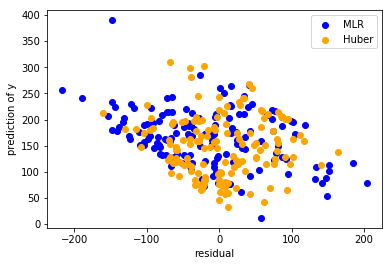

In [34]:
residual_mlr = y_test - y_test_predict
residual_huber = y_test - y_test_predict1
scatter(residual_mlr,y_test_predict,color = 'blue',label = 'MLR')
scatter(residual_huber,y_test_predict1,color = 'orange',label = 'Huber')

xlabel ('residual')
ylabel ('prediction of y')
legend (loc = 'best')

show()

The Huber model looks better for the following reasons:
  1. The residuals of the Huber model are more centuralized around 0 than those of the MLR model.
  2. The residuals of the MLR model shows a clearer linear pattern than those of the Huber model.

Now we will do feature selection. The features of X matrix are named as x1,x2,.... . We have created a list feature_name which stores the feature name (Code provided). So x1 means the first column of X, x2 means the second column of X and so on.

f) (5 points ) Backward Selection: Find the three most significant factors using backward feature selection. You may find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html. Use X_train and y_train for your model.


In [35]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

feature_name = ['x'+str(i) for i in range(1,11)]

estimator = linear_model.LinearRegression()
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X_train, y_train)
for i in range(len(feature_name)):
    if selector.support_[i] == True:
        print(feature_name[i])


x3
x5
x9


Therefore, x3, x5, and x9 are the 3 most significant factors using backward feature selection


g) (5 points) Forward Selection: Find the three most significant feature using forward selection. Check if it is same as the ones you got in part (f). Use X_train and y_train for your model. Hint : Use a for loop to implement forward feature selection

In [36]:
df = pd.DataFrame(X_train, columns = feature_name)

def forward_selection(X, Y):
    MSE_df = pd.DataFrame(np.zeros((10, 1)), columns = ['MSE'], index = feature_name)
    important_list = []
    a = 1
    
    while a <= 3:
        for i, column in enumerate(X.columns):
            if column not in important_list:
                model = linear_model.LinearRegression()
                model.fit(X[[column] + important_list], Y)
                y_predict = model.predict(X[[column] + important_list])
                MSE = mean_squared_error(y_predict, Y)
                MSE_df.iloc[i, 0] = MSE
            else:
                MSE_df.iloc[i, 0] = np.nan
        importantX = MSE_df['MSE'].idxmin()
        important_list.append(importantX)
        a += 1
    return important_list

forward_selection(df, y_train)

['x3', 'x9', 'x5']

Therefore, x3, x5, and x9 are the 3 most significant feature using forward selection, which are the same as the ones I got in part (f).

# Question 3. Sampling (5pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?



We know that for 
$$ n \geq p(1-p) \  (\cfrac {Z_{\alpha /2}}{\epsilon})^2$$

In [37]:
from scipy.stats import norm
alpha=0.1
epsilon=0.09
Z=norm.ppf(1-(alpha/2))
p=0.3
n=p*(1-p)*(Z/epsilon)**2

number=int(ceil(n))
print ('Sample size should at least be %s when p=0.3.' %number)

Sample size should at least be 71 when p=0.3.


(b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?



In [38]:
alpha=0.05
epsilon=0.09
Z=norm.ppf(1-(alpha/2))
p=0.3
n=p*(1-p)*(Z/epsilon)**2

number=int(ceil(n))
print ('Sample size should at least be %s when p=0.3.' %number)

Sample size should at least be 100 when p=0.3.


(c) (1pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.


In [39]:
alpha=0.05
epsilon=0.09
Z=norm.ppf(1-(alpha/2))
p=0.5
n=p*(1-p)*(Z/epsilon)**2

number=int(ceil(n))
print ('Sample size should at least be %s when p=0.5.' %number)

Sample size should at least be 119 when p=0.5.


# Question 4. Principal Component Analysis (10pts)

Use the following code to read in data of US Imports.

In [40]:
import pandas as pd
df = pd.read_csv('data_q4.csv', index_col=0)
df.head()

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton","Apparel,household goods-nontextile","Artwork, antiques, stamps, etc.",Automotive tires and tubes,Bakery products,Bauxite and aluminum,...,Toiletries and cosmetics,"Toys, games, and sporting goods","Trucks, buses, and special purpose vehicles","U.S. goods returned, and reimports",Vegetables,"Vessels, except scrap","Wine, beer, and related products","Wood, glass, plastic","Wool, silk, etc.",Zinc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0,2720.0,402303.0,0.0,12081.0,0.0,...,0.0,0.0,0.0,6156613.0,25873.0,0.0,61741.0,8474.0,3350.0,0.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0,889107.0,286011.0,0.0,0.0,182556.0,...,4446.0,0.0,0.0,66682.0,519964.0,0.0,14112.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,20217.0,0.0,0.0,0.0,...,22947.0,0.0,0.0,29474254.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0,3683.0,0.0,0.0,0.0,4741.0,...,0.0,0.0,0.0,67589.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0,0.0,6412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2992.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = stdScaler.fit_transform(df)


(a) (3pts) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.



Text(0,0.5,'Component 2')

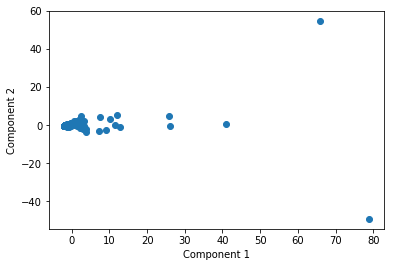

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(df_scaled)
scatter(result.T[0],result.T[1])
xlabel('Component 1')
ylabel('Component 2')

(b) (2pts) Find the names of the six countries with the highest first component (these should be clear outliers).



In [43]:
df1 = pd.DataFrame(result.T[0],index=df.index)
df1.sort_values(0,ascending=False)[:6].index.values


array(['China', 'Canada', 'Mexico', 'Japan', 'Germany', 'Italy'],
      dtype=object)

(c) (3pts) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.


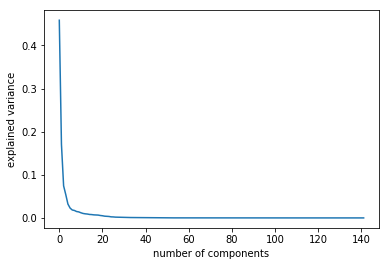

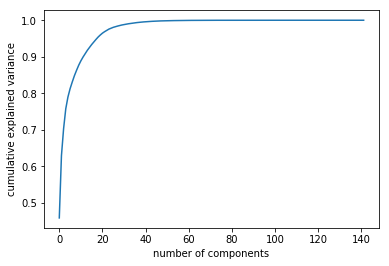

In [44]:
pca = PCA().fit(df_scaled)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
show()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
show()


(d) (2pts) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

In [45]:
print(np.cumsum(pca.explained_variance_ratio_))


[0.45836493 0.62891692 0.70331894 0.75741175 0.78950084 0.8123537
 0.83072741 0.84800627 0.86285645 0.87682848 0.88879573 0.89915412
 0.90866372 0.91765725 0.92570664 0.93345143 0.94053199 0.94745427
 0.95403019 0.95964134 0.96465473 0.96871142 0.9723949  0.975767
 0.97826611 0.9805557  0.98237039 0.98401913 0.98558463 0.98699029
 0.98819223 0.98934249 0.99030187 0.99120447 0.99205538 0.99288214
 0.99361456 0.99427297 0.99486905 0.99540193 0.99587987 0.99632409
 0.9967151  0.99706714 0.99741173 0.99772877 0.99796381 0.9981758
 0.99836487 0.9985225  0.9986641  0.9987945  0.99891777 0.99902951
 0.99913479 0.99922291 0.99930356 0.99937601 0.99944769 0.99951105
 0.99957032 0.99962234 0.99967218 0.9997134  0.99974523 0.99977535
 0.99980435 0.99982674 0.99984867 0.9998674  0.99988247 0.99989566
 0.99990732 0.99991807 0.99992801 0.99993761 0.99994584 0.99995317
 0.9999596  0.9999647  0.9999691  0.99997307 0.99997641 0.99997942
 0.99998173 0.9999839  0.99998594 0.99998762 0.99998915 0.99999059

In [46]:
print('1 principal component is required to explain cumulative variance of 30% ')
print('2 principal components are required to explain cumulative variance of 60% ')
print('13 principal components are required to explain cumulative variance of 90% ')

1 principal component is required to explain cumulative variance of 30% 
2 principal components are required to explain cumulative variance of 60% 
13 principal components are required to explain cumulative variance of 90% 


# Question 5. PCA (conceptual) (10pts)

(a) (5pts) Give two reasons why we might want to use PCA.



Reasons:
1. To reduce colinearity due to too many variables. 
2. To reduce the dimension of data, easy to fit model and visualise the data.')


(b) (5pts) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.

Explanation:

Eigenvectors of covariance matrix represent the directions where the original data could be projected to, i.e. the components. 

Eigenvalues represent the variance of component projected on the eigenvector related to that eigenvalue. Therefore, larger eigenvalue mean that the components related to that eigenvalue contain more information of the original data. Components with the largest eigenvalues become principal components.